In [94]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

In [95]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [96]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [97]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [98]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [99]:
train.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [100]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


(array([ 4284.,  2337.,  1686.,  1067.,   633.,   426.,   233.,   116.,
           85.,    19.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

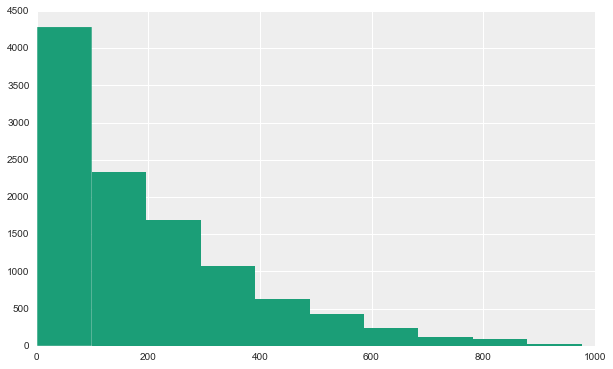

In [101]:
plt.hist(train['count'])

In [102]:
train['count_for_train'] = np.log(train['count']+1)
#Did this just to optimize my model on rmse
train['casual_for_train'] = np.log(train['casual']+1)
train['registered_for_train'] = np.log(train['registered']+1)

(array([  237.,   462.,   625.,   626.,   805.,  1076.,  1768.,  2544.,
         2058.,   685.]),
 array([ 0.69314718,  1.31238343,  1.93161968,  2.55085593,  3.17009218,
         3.78932843,  4.40856467,  5.02780092,  5.64703717,  6.26627342,
         6.88550967]),
 <a list of 10 Patch objects>)

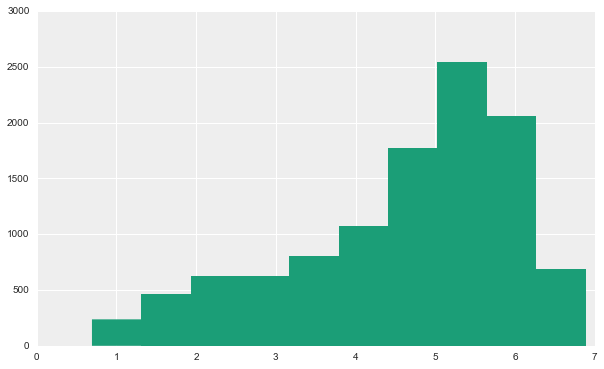

In [103]:
plt.hist(train['count_for_train'])

In [104]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [105]:
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year
train['hour'] = train['datetime'].dt.hour

test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year
test['hour'] = test['datetime'].dt.hour

In [106]:
st.pearsonr(train['month'], train['season'])
#97% correlated!

(0.97152379963239277, 0.0)

In [107]:
casual = train.copy()
registered = train.copy()

In [108]:
train['month_order'] = train['month']
train['month_order'][train['year']==2012] = 12+train['month_order'][train['year']==2012]

test['month_order'] = test['month']
test['month_order'][test['year']==2012] = 12+test['month_order'][test['year']==2012]

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [109]:
test_cas = test.copy()
test_reg = test.copy()

In [110]:
casual['month_order'] = train['month_order']
registered['month_order'] = train['month_order']

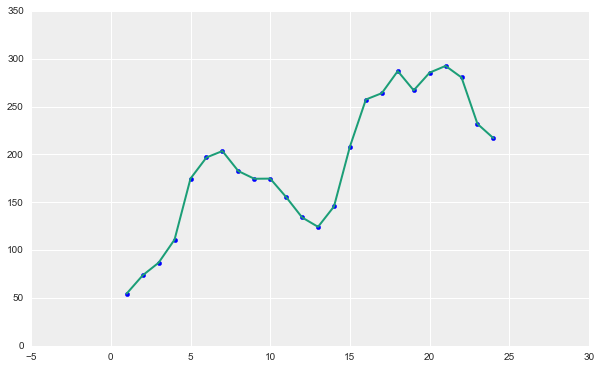

In [111]:
t = train.groupby('month_order')['month_order','count'].mean()
plt.plot(t['month_order'], t['count'])
plt.scatter(t['month_order'], t['count'], color = 'b')

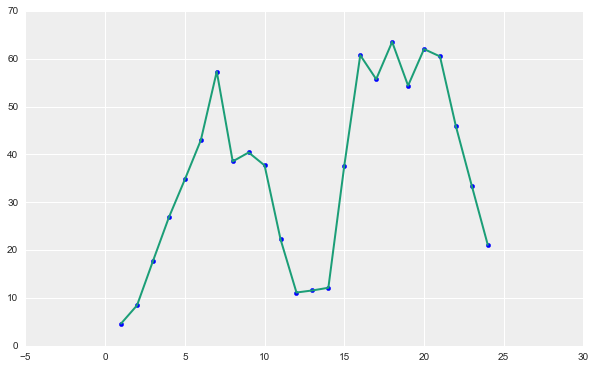

In [112]:
t = train.groupby('month_order')['month_order','casual'].mean()
plt.plot(t['month_order'], t['casual'])
plt.scatter(t['month_order'], t['casual'], color = 'b')

In [113]:
casual['month_bin'] = casual['month_order']
casual['month_bin'][(casual['month_bin']>7) & (casual['month_bin']<11)] = 8
casual['month_bin'][(casual['month_bin']>11) & (casual['month_bin']<15)] = 12
casual['month_bin'][(casual['month_bin']>15) & (casual['month_bin']<22)] = 16
casual_cat = []
#casual_cat += ['month_bin']

test_cas['month_bin'] = test_cas['month_order']
test_cas['month_bin'][(test_cas['month_bin']>7) & (test_cas['month_bin']<11)] = 8
test_cas['month_bin'][(test_cas['month_bin']>11) & (test_cas['month_bin']<15)] = 12
test_cas['month_bin'][(test_cas['month_bin']>15) & (test_cas['month_bin']<22)] = 16
casual_cat = []
#casual_cat += ['month_bin']

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__ma

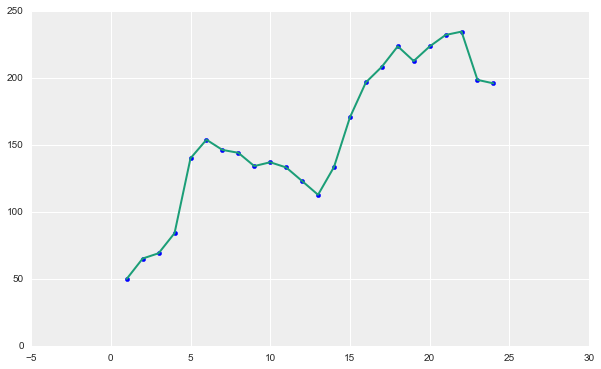

In [114]:
t = train.groupby('month_order')['month_order','registered'].mean() 
plt.plot(t['month_order'], t['registered'])
plt.scatter(t['month_order'], t['registered'], color = 'b')

In [115]:
registered['month_bin'] = 1
#registered['month_bin'][(registered['month_bin']>0) & (registered['month_bin']<5)] = 2
registered['month_bin'][(registered['month_bin']>4) & (registered['month_bin']<15)] = 2
registered['month_bin'][(registered['month_bin']>14)] = 3
registered_cat = []
#registered_cat += ['month_bin']

test_reg['month_bin'] = 1
#test_reg['month_bin'][(test_reg['month_bin']>0) & (test_reg['month_bin']<5)] = 2
test_reg['month_bin'][(test_reg['month_bin']>4) & (test_reg['month_bin']<15)] = 2
test_reg['month_bin'][(test_reg['month_bin']>14)] = 3
registered_cat = []
#registered_cat += ['month_bin']

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A v

In [116]:
# train.head()
# cat = ['season','weather']
# cont = ['holiday','workingday','temp','atemp','humidity','windspeed','day','month','year','hour']
# data_for_train = pd.get_dummies(train[cat])
# data_for_train[cont] = train[cont]

# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# rf.fit(data_for_train, train['count_for_train'])

# data_for_test = pd.get_dummies(test[cat])
# data_for_test[cont] = test[cont]

# test_datetime = test['datetime']
# with open('basic.csv', "wb") as outfile:
#     outfile.write("datetime,count\n")
#     for e, val in enumerate(list(rf.predict(data_for_test))):
#         outfile.write("%s,%s\n"%(test_datetime[e],int(np.exp(val)-1)))

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64


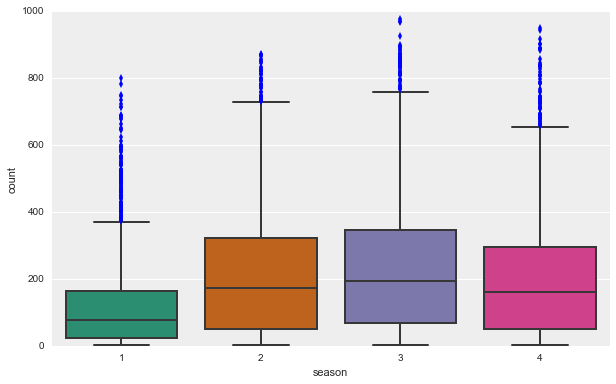

In [117]:
print train['season'].value_counts()
#starting with season 
sns.boxplot(train['season'], train['count'])

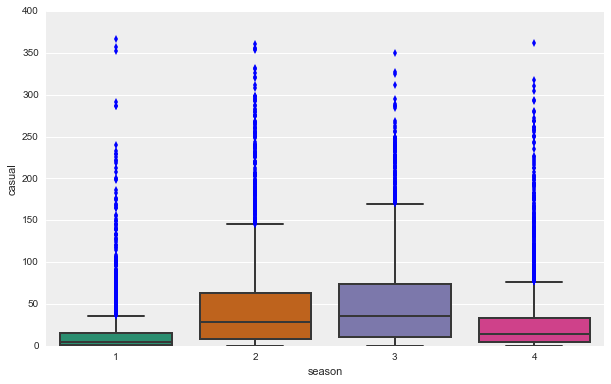

In [118]:
sns.boxplot(train['season'], train['casual'])

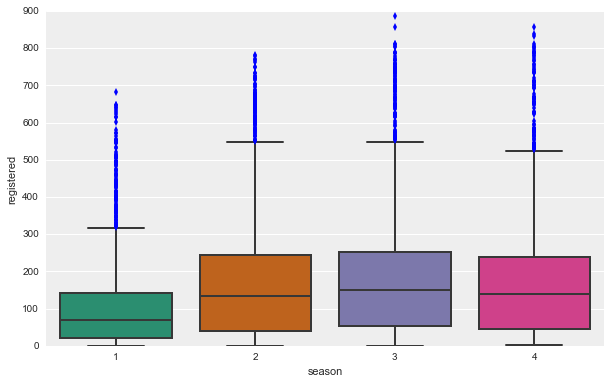

In [119]:
sns.boxplot(train['season'], train['registered'])

In [120]:
casual_cat += ['season']
registered_cat += ['season']

In [121]:
train.groupby('season')['registered'].mean()

season
1    100.853686
2    167.804610
3    182.196853
4    170.407462
Name: registered, dtype: float64

In [122]:
#Based on above lets merge 2,3,4 since mean consumption is almost same.
registered['season'][registered['season']>1] = 2
test_reg['season'][test_reg['season']>1] = 2

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [123]:
print train[train['season'] == 1]['month'].unique()
print train[train['season'] == 2]['month'].unique()
print train[train['season'] == 3]['month'].unique()
print train[train['season'] == 4]['month'].unique()

#Season and month are almost equal
#To decide whether to use month or season

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


In [124]:
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

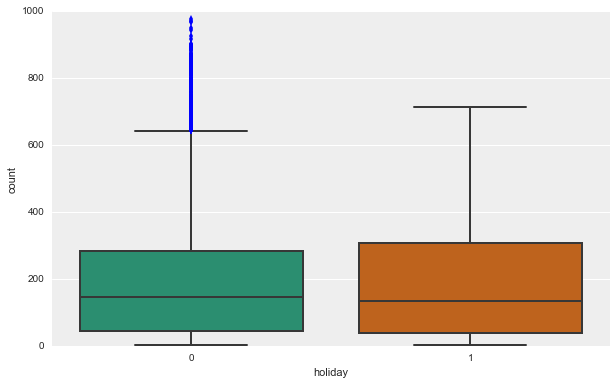

In [125]:
sns.boxplot(train['holiday'], train['count'])

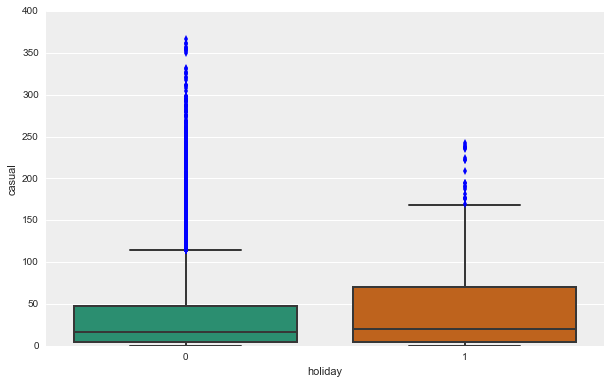

In [126]:
sns.boxplot(train['holiday'], train['casual'])

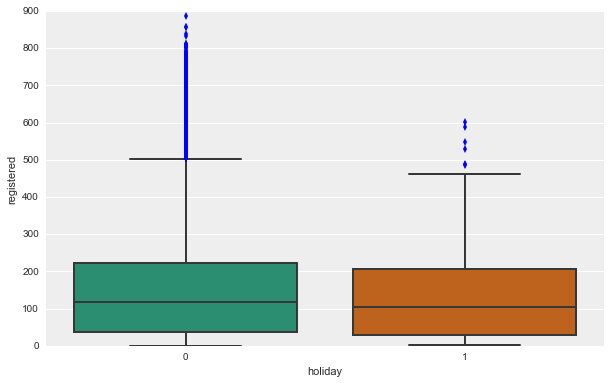

In [127]:
sns.boxplot(train['holiday'], train['registered'])

In [128]:
train['weekend'] = 0
train['weekend'][(train['holiday']==0)&(train['workingday']==0)] = 1

test_reg['weekend'] = 0
test_reg['weekend'][(test_reg['holiday']==0)&(test_reg['workingday']==0)] = 1

test_cas['weekend'] = 0
test_cas['weekend'][(test_cas['holiday']==0)&(test_cas['workingday']==0)] = 1

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [129]:
train['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

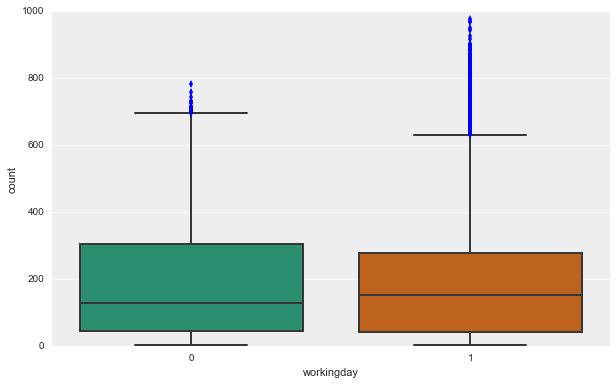

In [130]:
sns.boxplot(train['workingday'], train['count'])

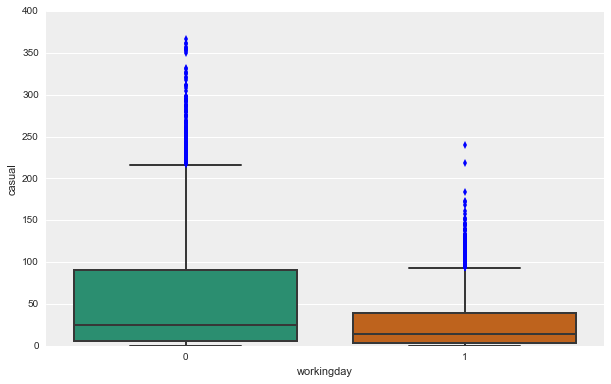

In [131]:
sns.boxplot(train['workingday'], train['casual'])

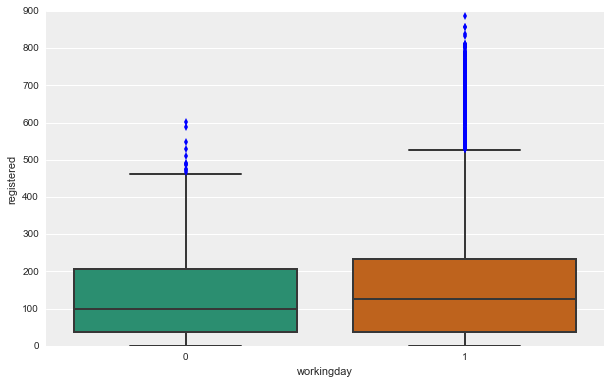

In [132]:
sns.boxplot(train['workingday'], train['registered'])

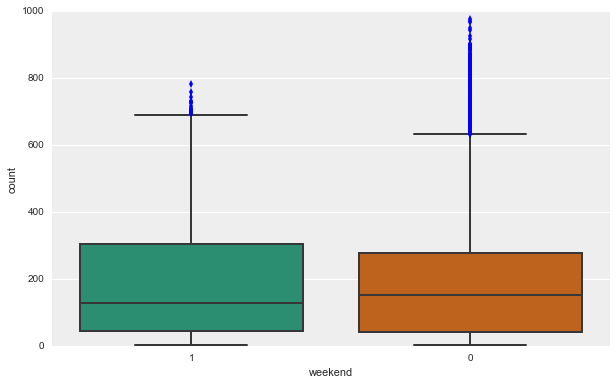

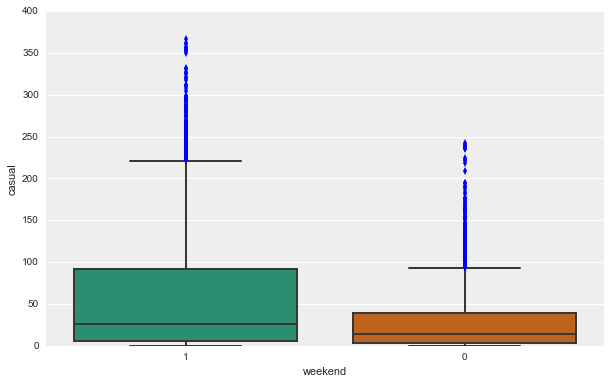

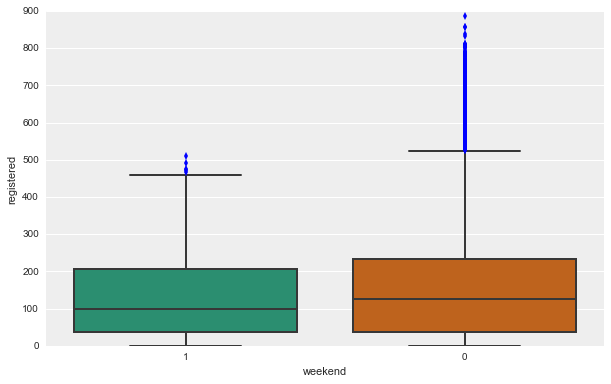

In [133]:
sns.boxplot(train['weekend'], train['count'])
plt.show()
sns.boxplot(train['weekend'], train['casual'])
plt.show()
sns.boxplot(train['weekend'], train['registered'])
plt.show()

In [134]:
casual['weekend'] = train['weekend']
registered['weekend'] = train['weekend']

In [135]:
casual_cont = []
registered_cont = []
casual_cont += ['holiday','workingday']
registered_cont += ['holiday','workingday']

In [136]:
st.pearsonr(train['weekend'], train['workingday'])

(-0.93477992443929947, 0.0)

In [137]:
train['date'] = train['datetime'].dt.date
train.groupby('date')['casual'].mean()

date
2011-01-01    13.791667
2011-01-02     5.695652
2011-01-03     5.454545
2011-01-04     4.695652
2011-01-05     3.565217
2011-01-06     3.826087
2011-01-07     6.434783
2011-01-08     2.833333
2011-01-09     2.250000
2011-01-10     1.708333
2011-01-11     1.954545
2011-01-12     1.136364
2011-01-13     1.583333
2011-01-14     2.347826
2011-01-15     9.250000
2011-01-16    10.458333
2011-01-17     4.875000
2011-01-18     0.750000
2011-01-19     3.391304
2011-02-01     2.043478
2011-02-02     3.000000
2011-02-03     2.652174
2011-02-04     3.826087
2011-02-05     4.166667
2011-02-06    14.750000
2011-02-07     5.000000
2011-02-08     2.666667
2011-02-09     2.304348
2011-02-10     2.043478
2011-02-11     6.772727
                ...    
2012-11-09    29.541667
2012-11-10    87.083333
2012-11-11    95.416667
2012-11-12    45.708333
2012-11-13    13.625000
2012-11-14    15.541667
2012-11-15    13.333333
2012-11-16    20.166667
2012-11-17    54.708333
2012-11-18    38.416667
2012-11-19 

In [138]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_for_train,casual_for_train,registered_for_train,day,month,year,hour,month_order,weekend
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.160452,0.167172,0.157381,0.001729,0.971524,-0.004797,-0.006546,0.480533,-0.002433
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.001231,0.029487,-0.008956,-0.015877,0.001731,0.012021,-0.000354,0.011312,-0.109748
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.015326,-0.208715,0.031922,0.009829,-0.003394,-0.002482,0.002780,-0.003851,-0.934780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.108005,-0.149943,-0.096462,-0.007890,0.012144,-0.012548,-0.022740,-0.004847,-0.032078
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.376587,0.562596,0.330701,0.015551,0.257589,0.061226,0.145430,0.181726,-0.030873
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.372167,0.559950,0.326022,0.011866,0.264173,0.058540,0.140343,0.182676,-0.023405
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.333158,-0.366263,-0.317667,-0.011335,0.204537,-0.078606,-0.278011,0.033727,0.010463
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.122754,0.116786,0.121142,0.036157,-0.150192,-0.015221,0.146631,-0.088161,-0.016816
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.579034,0.780839,0.510717,0.014109,0.092722,0.145241,0.302045,0.172492,0.311558
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.792129,0.629648,0.805086,0.019111,0.169451,0.264265,0.380540,0.314218,-0.114959


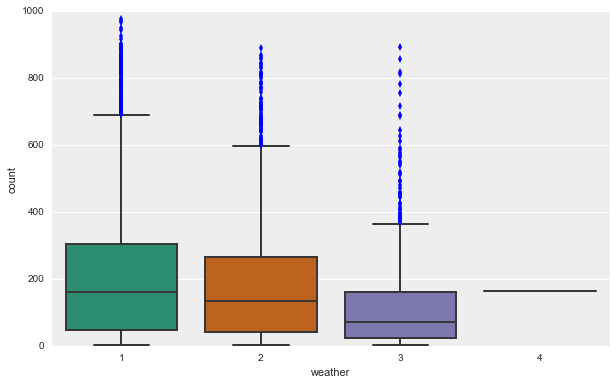

In [139]:
sns.boxplot(train['weather'], train['count'])

In [140]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [141]:
train['weather'][train['weather'] == 4] = 1
test_cas['weather'][test_cas['weather'] == 4] = 1
test_reg['weather'][test_reg['weather'] == 4] = 1

casual['weather'][casual['weather'] == 4] = 1
casual['weather'][casual['weather'] == 4] = 1

registered['weather'][registered['weather'] == 4] = 1
registered['weather'][registered['weather'] == 4] = 1

casual_cat += ['weather']
registered_cat += ['weather']

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7

In [142]:
test['weather'].value_counts()

1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64

(array([   69.,   648.,  1440.,  1891.,  1587.,  1753.,  1901.,  1194.,
          355.,    48.]),
 array([  0.82 ,   4.838,   8.856,  12.874,  16.892,  20.91 ,  24.928,
         28.946,  32.964,  36.982,  41.   ]),
 <a list of 10 Patch objects>)

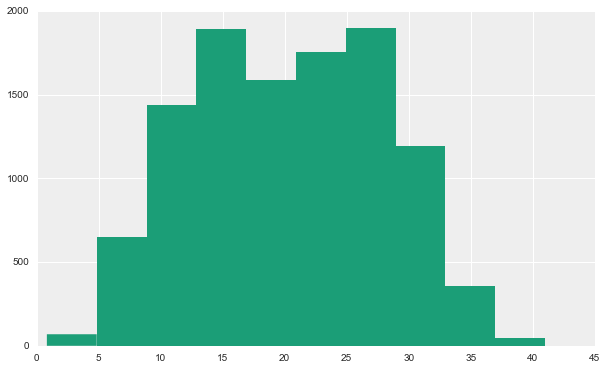

In [143]:
plt.hist(train['temp'])

(array([   44.,   406.,  1243.,  1679.,  1790.,  1962.,  1832.,  1425.,
          440.,    65.]),
 array([  0.76  ,   5.2295,   9.699 ,  14.1685,  18.638 ,  23.1075,
         27.577 ,  32.0465,  36.516 ,  40.9855,  45.455 ]),
 <a list of 10 Patch objects>)

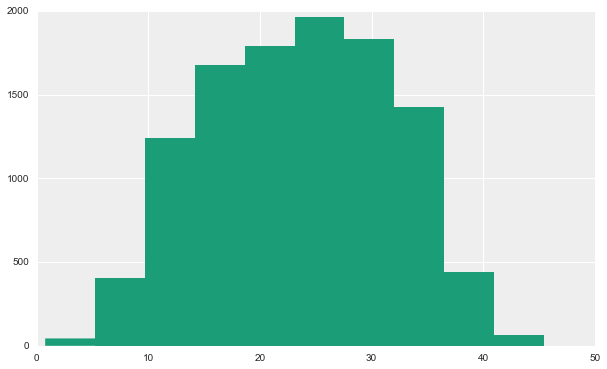

In [144]:
plt.hist(train['atemp'])

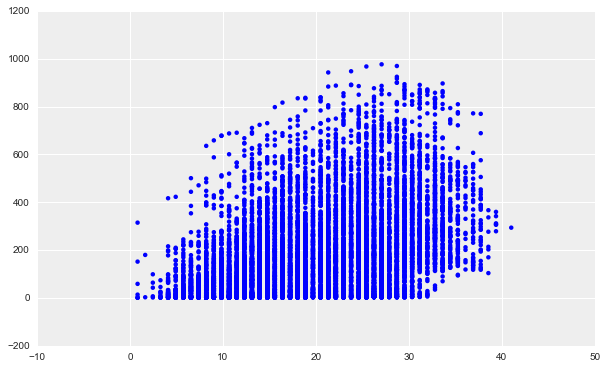

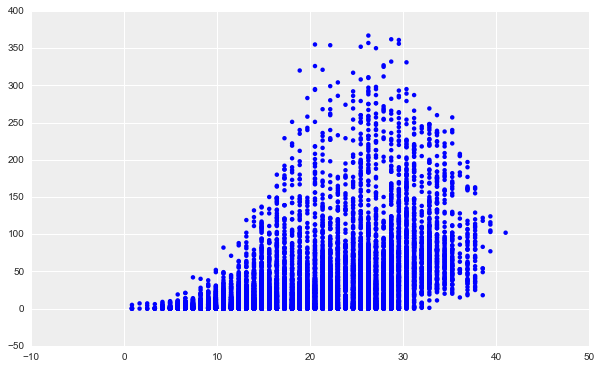

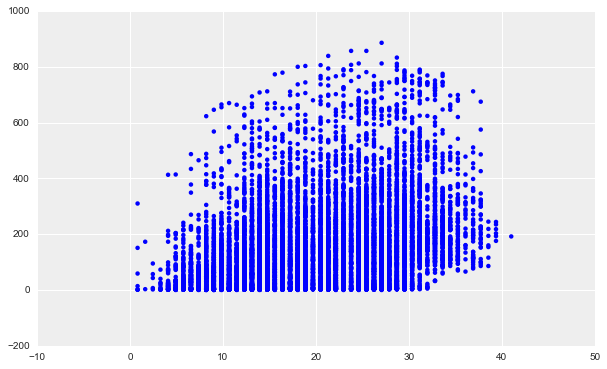

In [145]:
plt.scatter(train['temp'], train['count'])
plt.show()
plt.scatter(train['temp'], train['casual'])
plt.show()
plt.scatter(train['temp'], train['registered'])
plt.show()

In [146]:
#Creating new feature in casual based on temp and atemp
casual['temp_trend'] = 0
casual['temp_trend'][casual['temp']>20] = 1
casual_cont += ['atemp']

#Creating new feature in casual based on temp and atemp
test_cas['temp_trend'] = 0
test_cas['temp_trend'][test['temp']>20] = 1

# test_reg['temp_trend'] = 0
# test_reg['temp_trend'][test['temp']>20] = 1

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [147]:
casual_cont += ['temp_trend']
registered_cont += ['atemp']

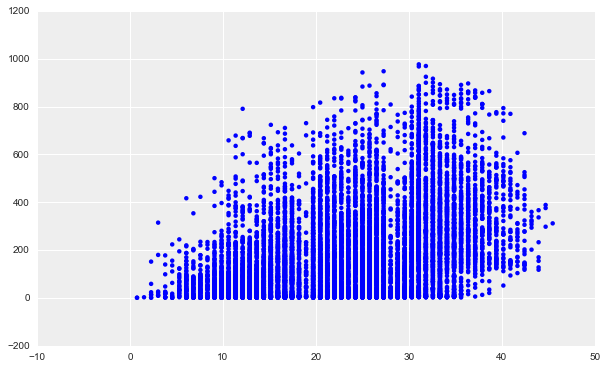

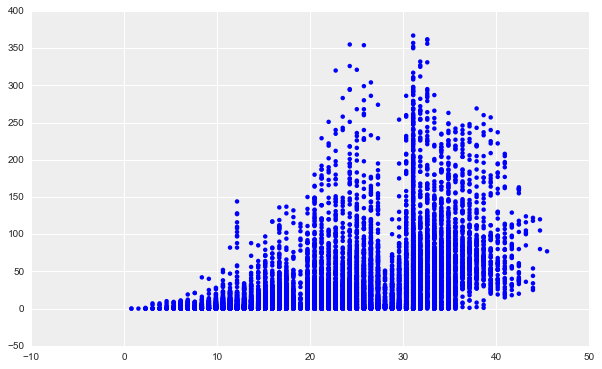

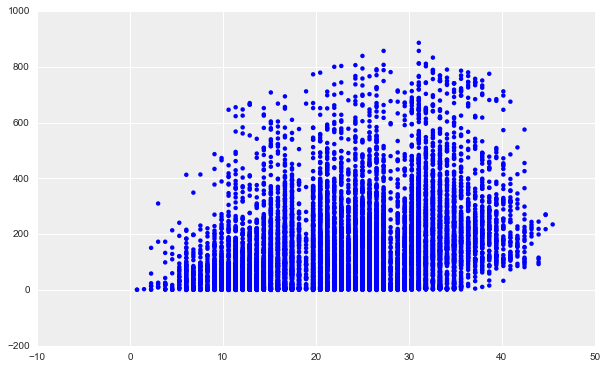

In [148]:
plt.scatter(train['atemp'], train['count'])
plt.show()
plt.scatter(train['atemp'], train['casual'])
plt.show()
plt.scatter(train['atemp'], train['registered'])
plt.show()

(array([   23.,    45.,   364.,  1039.,  1727.,  1842.,  1748.,  1736.,
         1676.,   686.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

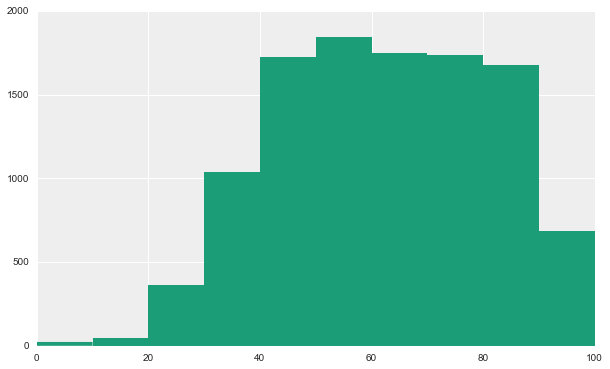

In [149]:
plt.hist(train['humidity'])

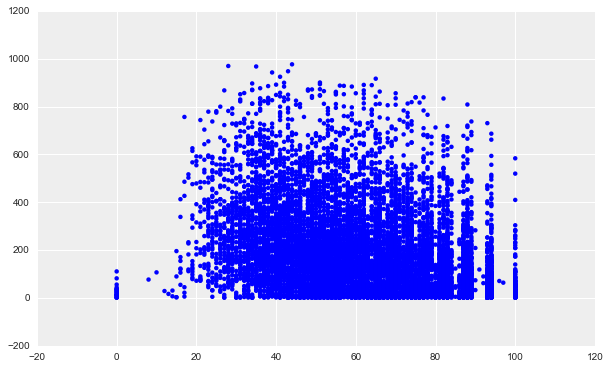

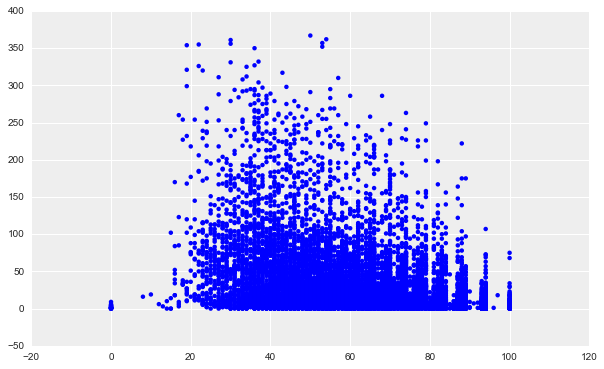

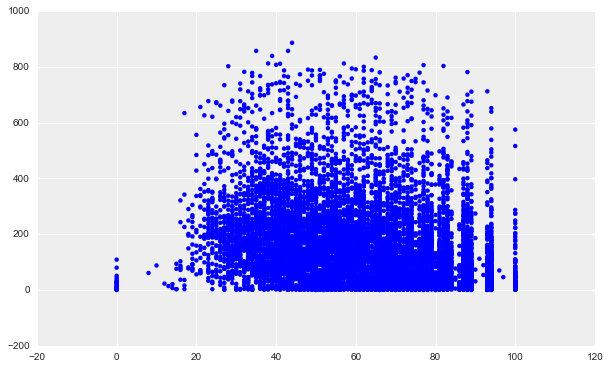

In [150]:
plt.scatter(train['humidity'], train['count'])
plt.show()
plt.scatter(train['humidity'], train['casual'])
plt.show()
plt.scatter(train['humidity'], train['registered'])
plt.show()

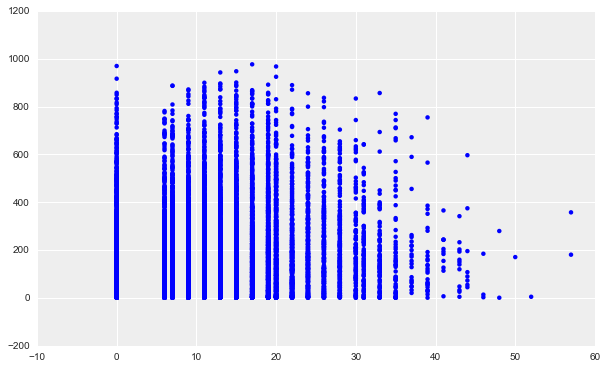

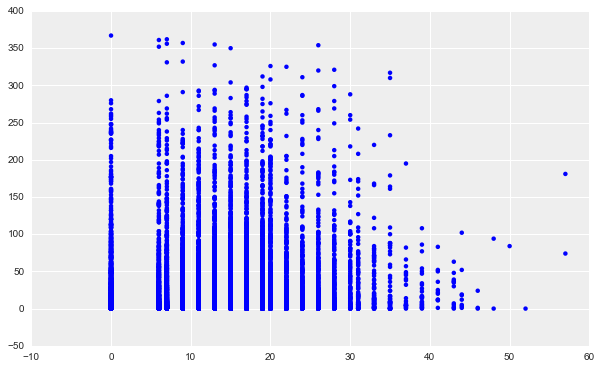

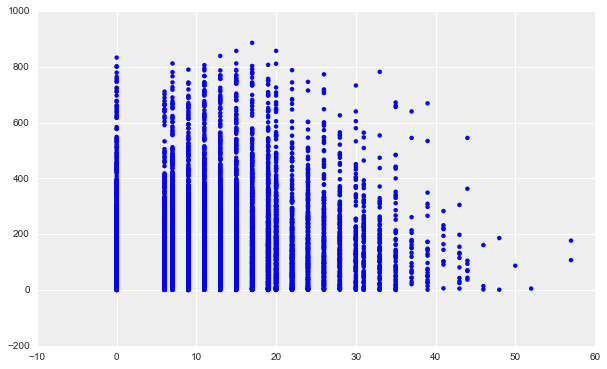

In [151]:
plt.scatter(train['windspeed'], train['count'])
plt.show()
plt.scatter(train['windspeed'], train['casual'])
plt.show()
plt.scatter(train['windspeed'], train['registered'])
plt.show()

(array([  1.31300000e+03,   0.00000000e+00,   1.90600000e+03,
          2.17700000e+03,   1.04200000e+03,   1.78500000e+03,
          6.76000000e+02,   8.64000000e+02,   2.74000000e+02,
          4.22000000e+02,   2.00000000e+02,   8.00000000e+01,
          8.00000000e+01,   2.70000000e+01,   1.10000000e+01,
          2.00000000e+01,   5.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.00000000e+00]),
 array([  0.      ,   2.849845,   5.69969 ,   8.549535,  11.39938 ,
         14.249225,  17.09907 ,  19.948915,  22.79876 ,  25.648605,
         28.49845 ,  31.348295,  34.19814 ,  37.047985,  39.89783 ,
         42.747675,  45.59752 ,  48.447365,  51.29721 ,  54.147055,  56.9969  ]),
 <a list of 20 Patch objects>)

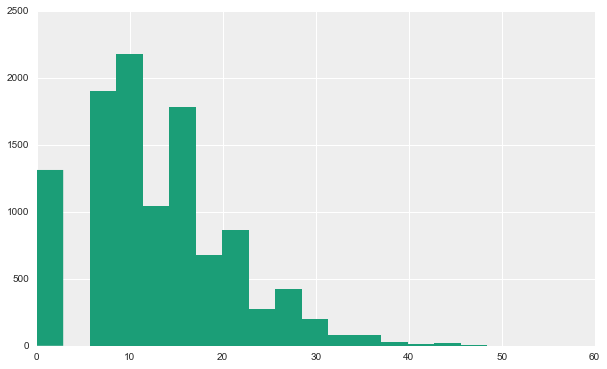

In [152]:
plt.hist(train['windspeed'], bins = 20)

In [153]:
casual_cont += ['humidity','windspeed']
registered_cont += ['humidity','windspeed']

In [154]:
# for dat in train['date'].unique():
#     plt.plot(train['hour'][train['date']==dat],train['windspeed'][train['date']==dat], color = 'm')
#     plt.plot(train['hour'][train['date']==dat],train['count'][train['date']==dat])
#     plt.show()

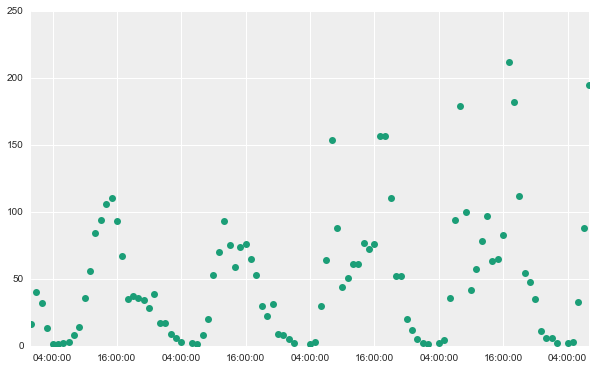

In [155]:
from datetime import datetime
import matplotlib
dates = matplotlib.dates.date2num(train.iloc[0:100]['datetime'].astype(datetime))
plt.plot_date(dates, train.iloc[0:100]['count'])

In [156]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, train[['atemp','humidity','windspeed']], train['count_for_train'], cv = 5, scoring = 'mean_squared_error'))

-2.1400411653981686

In [157]:
# train['date'] = train['datetime'].dt.date

In [158]:
# from datetime import datetime
# import matplotlib
# dates = matplotlib.dates.date2num(train['date'].astype(datetime))
# plt.plot_date(dates, train['count'])

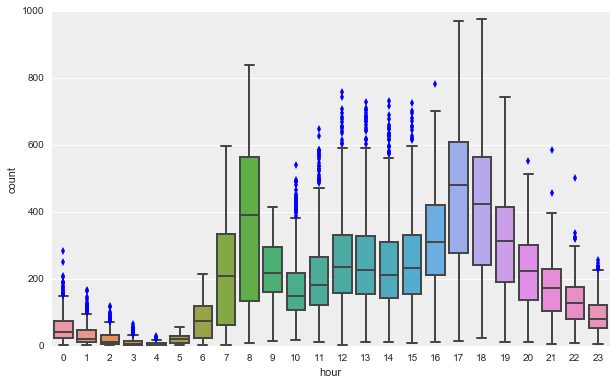

In [159]:
sns.boxplot(train['hour'],train['count'])

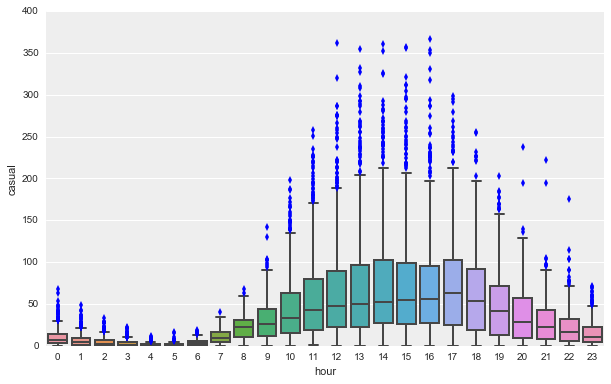

In [160]:
sns.boxplot(train['hour'],train['casual'])

In [161]:
casual['hour_bin'] = 1
casual['hour_bin'][casual['hour']>9] = 2
casual['hour_bin'][casual['hour']>20] = 3

test_cas['hour_bin'] = 1
test_cas['hour_bin'][test_cas['hour']>9] = 2
test_cas['hour_bin'][test_cas['hour']>20] = 3

registered['hour_bin'] = 1
registered['hour_bin'][registered['hour']>6] = 2
registered['hour_bin'][registered['hour']==8] = 3
registered['hour_bin'][registered['hour']==17] = 4
registered['hour_bin'][registered['hour']==18] = 5

test_reg['hour_bin'] = 1
test_reg['hour_bin'][test_reg['hour']>6] = 2
test_reg['hour_bin'][test_reg['hour']==8] = 3
test_reg['hour_bin'][test_reg['hour']==17] = 4
test_reg['hour_bin'][test_reg['hour']==18] = 5

casual_cat += ['hour_bin']
registered_cat += ['hour_bin']

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__ma

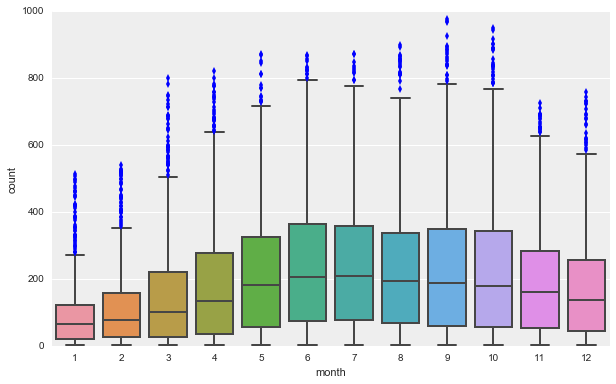

In [162]:
sns.boxplot(train['month'],train['count'])

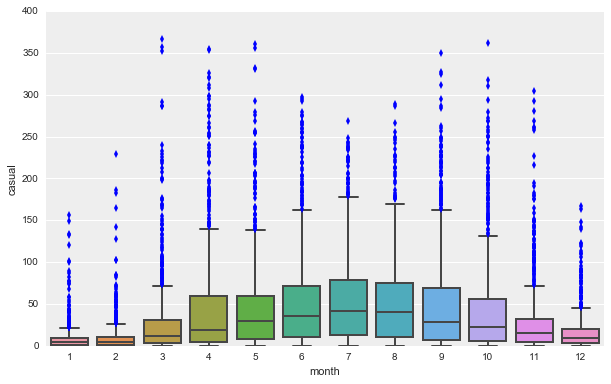

In [163]:
sns.boxplot(train['month'],train['casual'])

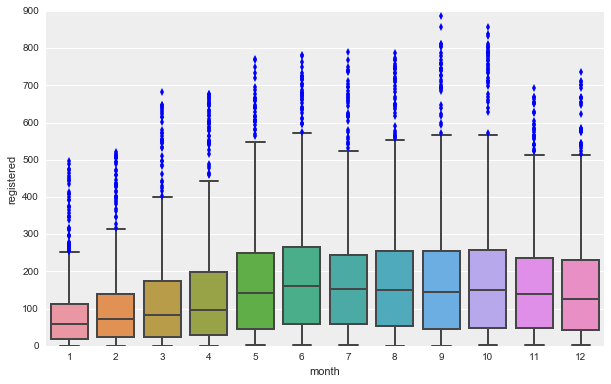

In [164]:
sns.boxplot(train['month'],train['registered'])

In [165]:
#Month very similar to season so not keeping months only season

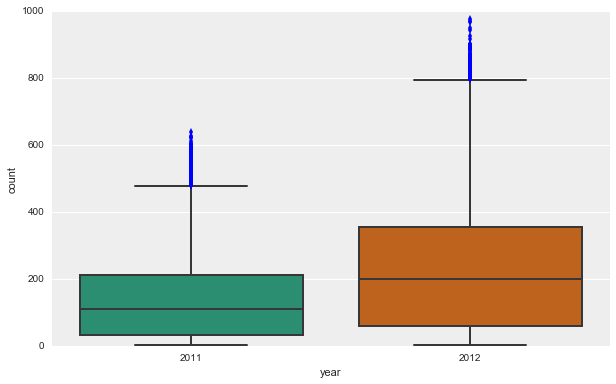

In [166]:
sns.boxplot(train['year'],train['count'])

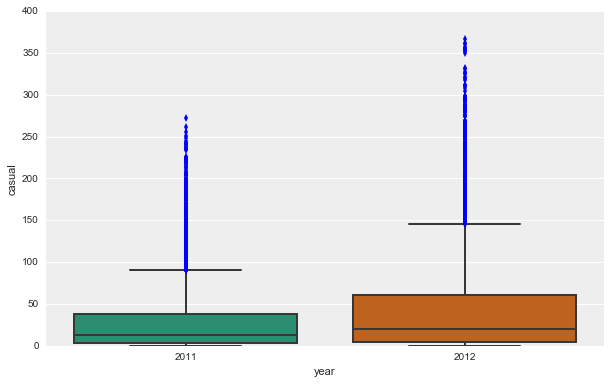

In [167]:
sns.boxplot(train['year'],train['casual'])

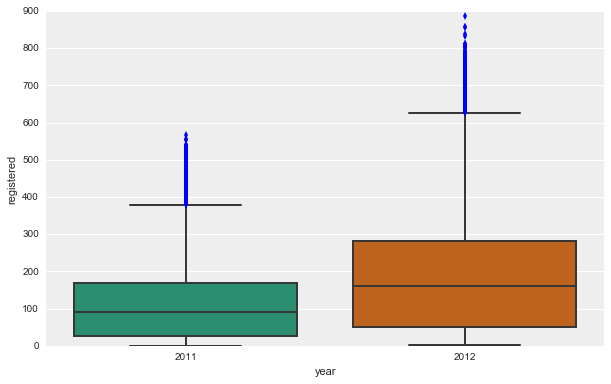

In [168]:
sns.boxplot(train['year'],train['registered'])

In [169]:
casual_cat += ['year']
registered_cat += ['year']

In [170]:
# train['day_of_week'] = train['datetime'].dt.dayofweek
# test['day_of_week'] = test['datetime'].dt.dayofweek

In [171]:
# sns.boxplot(train['day_of_week'], train['count'])

In [172]:
# sns.boxplot(train['day_of_week'], train['casual'])

In [173]:
# sns.boxplot(train['day_of_week'], train['registered'])

In [174]:
# train['workingday'].value_counts()

In [175]:
# train['day_of_week'].value_counts()

In [176]:
# train['weekend'] = 0
# train['weekend'][train['day_of_week']>4] = 1
# test['weekend'] = 0
# test['weekend'][test['day_of_week']>4] = 1

In [177]:
# train['month_casual'] = 1
# train['month_casual'][(train['month']>3) & (train['month']<11)] = 2
# train['month_casual'][train['month']>10] = 3

# test['month_casual'] = 1
# test['month_casual'][(test['month']>3) & (test['month']<11)] = 2
# test['month_casual'][test['month']>10] = 3

In [178]:
# train['hour_casual'] = 1
# train['hour_casual'][(train['hour']>8) & (train['hour']<21)] = 2
# train['hour_casual'][train['hour']>20] = 3

# test['hour_casual'] = 1
# test['hour_casual'][(test['hour']>8) & (test['hour']<21)] = 2
# test['hour_casual'][test['hour']>20] = 3

In [191]:
print casual_cat
print casual_cont

['month_bin', 'season', 'weather', 'hour_bin']
['holiday', 'workingday', 'atemp', 'temp_trend', 'humidity', 'windspeed', 'month', 'hour']


In [192]:
print registered_cat
print registered_cont

['season', 'weather', 'hour_bin', 'year']
['holiday', 'workingday', 'atemp', 'humidity', 'windspeed', 'month', 'hour', 'month', 'hour']


In [181]:
casual_cont += ['month','hour']

In [182]:
#casual_cont += ['month_order']

In [184]:
registered_cont += ['month','hour']

In [193]:
casual_cat.remove('year')
#casual_cat.remove('month_bin')

In [194]:
#Breaking dataset in two parts
casual_trainable_data_2011 = pd.get_dummies(casual[casual_cat][casual['year']==2011])
casual_trainable_data_2011[casual_cont] = casual[casual_cont][casual['year']==2011]
#casual_trainable_data[casual_cat] = casual[casual_cat]

test_cas_predict_2011 = pd.get_dummies(test_cas[casual_cat][test_cas['year']==2011])
test_cas_predict_2011[casual_cont] = test_cas[casual_cont][test_cas['year']==2011]
#test_cas_predict[casual_cat] = test_cas[casual_cat]

casual_trainable_data_2012 = pd.get_dummies(casual[casual_cat][casual['year']==2012])
casual_trainable_data_2012[casual_cont] = casual[casual_cont][casual['year']==2012]
#casual_trainable_data[casual_cat] = casual[casual_cat]

test_cas_predict_2012 = pd.get_dummies(test_cas[casual_cat][test_cas['year']==2012])
test_cas_predict_2012[casual_cont] = test_cas[casual_cont][test_cas['year']==2012]
#test_cas_predict[casual_cat] = test_cas[casual_cat]

In [199]:
casual_cat += ['year']
casual_trainable_data = pd.get_dummies(casual[casual_cat])
casual_trainable_data[casual_cont] = casual[casual_cont]
#casual_trainable_data[casual_cat] = casual[casual_cat]

test_cas_predict = pd.get_dummies(test_cas[casual_cat])
test_cas_predict[casual_cont] = test_cas[casual_cont]
#test_cas_predict[casual_cat] = test_cas[casual_cat]

In [103]:
#casual_trainable_data.corr()
#test_cas_predict.drop('month_bin', axis=1, inplace=True)

In [106]:
from sklearn.grid_search import GridSearchCV
# feat = [u'season','holiday', u'workingday', u'weather',
#        u'atemp', u'humidity', u'windspeed', u'year', u'hour', u'month_order', u'weekend',
#        u'temp_trend', u'hour_bin','month']
rf = RandomForestRegressor()
param_grid = {'n_estimators':[50,500,50],
            'max_features':[0.5,1.0,0.05]
             }
grid_search = GridSearchCV(rf, param_grid=param_grid, scoring = 'mean_squared_error')
grid_search.fit(casual_trainable_data, casual['casual_for_train'])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 500, 50], 'max_features': [0.5, 1.0, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [107]:
grid_search.best_params_

{'max_features': 0.5, 'n_estimators': 500}

In [200]:
#grid_search.best_params_
rf1 = RandomForestRegressor(max_features =  0.5, n_estimators = 500)
rf1.fit(casual_trainable_data, casual['casual_for_train'])
predi1 = rf1.predict(test_cas_predict)
print np.mean(cross_val_score(rf1, casual_trainable_data, casual['casual_for_train'], cv = 5, scoring = 'mean_squared_error'))

-0.356907246267


In [195]:
#grid_search.best_params_
rf1_2011 = RandomForestRegressor(max_features =  0.5, n_estimators = 500)
rf1_2011.fit(casual_trainable_data_2011, casual['casual_for_train'][casual['year']==2011])
predi1_2011 = rf1_2011.predict(test_cas_predict_2011)
print np.mean(cross_val_score(rf1_2011, casual_trainable_data_2011, casual['casual_for_train'][casual['year']==2011], cv = 5, scoring = 'mean_squared_error'))

#No profit of modelling 2011 & 2012 separately

-0.434818582736


In [198]:
#grid_search.best_params_
rf1_2012 = RandomForestRegressor(max_features =  0.5, n_estimators = 500)
rf1_2012.fit(casual_trainable_data_2012, casual['casual_for_train'][casual['year']==2012])
predi1_2012 = rf1_2011.predict(test_cas_predict_2012)
print np.mean(cross_val_score(rf1_2012, casual_trainable_data_2012, casual['casual_for_train'][casual['year']==2012], cv = 5, scoring = 'mean_squared_error'))

-0.476284325532


In [109]:
# print np.mean(cross_val_score(rf1, casual_trainable_data, casual['casual_for_train'], cv = 5, scoring = 'mean_squared_error'))

-0.350979383843


In [110]:
importances = rf1.feature_importances_
indices = np.argsort(importances)[::-1]
for i in indices:
    print casual_trainable_data.columns[i]

hour
atemp
hour_bin
temp_trend
workingday
month
humidity
windspeed
weather
year
holiday


In [113]:
#registered_trainable_data = pd.get_dummies(registered[registered_cat])
registered_trainable_data = pd.DataFrame()
registered_trainable_data[registered_cont] = registered[registered_cont]
registered_trainable_data[registered_cat] = registered[registered_cat]

test_reg_predict = pd.DataFrame()
#test_reg_predict = pd.get_dummies(test_reg[registered_cat])
test_reg_predict[registered_cont] = test_reg[registered_cont]
test_reg_predict[registered_cat] = test_reg[registered_cat]

In [121]:
#registered_trainable_data.corr()
#registered_trainable_data.drop('month_bin', axis=1, inplace=True)
#test_reg_predict.drop('month_bin', axis=1, inplace=True)

In [ ]:
from sklearn.grid_search import GridSearchCV
# feat = [u'season', u'holiday', u'workingday', u'weather',
#        u'atemp', u'humidity', u'windspeed', u'year', u'hour', u'month_order', u'hour_bin']
rf = RandomForestRegressor()
param_grid = {'n_estimators':[50,500,50],
            'max_features':[0.3,1.0,0.5]
             }
grid_search = GridSearchCV(rf, param_grid=param_grid, scoring = 'mean_squared_error')
grid_search.fit(registered_trainable_data, registered['registered_for_train'])

In [ ]:
print grid_search.best_params_

In [122]:
#print grid_search.best_params_
rf2 = RandomForestRegressor(max_features =  0.5, n_estimators = 500)
rf2.fit(registered_trainable_data, registered['registered_for_train'])
predi2 = rf2.predict(test_reg_predict)

In [123]:
print np.mean(cross_val_score(rf2, registered_trainable_data, registered['registered_for_train'], cv = 5, scoring = 'mean_squared_error'))

-0.218503846676


In [ ]:
importances = rf2.feature_importances_
indices = np.argsort(importances)[::-1]
for i in indices:
    print registered_trainable_data.columns[i]

In [ ]:
predi = np.around(np.exp(predi1))-1+np.around(np.exp(predi2))-1

test_datetime = test['datetime']
with open('sub3.csv', "wb") as outfile:
    outfile.write("datetime,count\n")
    for e, val in enumerate(list(predi)):
        outfile.write("%s,%s\n"%(test_datetime[e],int(val)))

In [ ]:
# cat = ['season','weather']
# cont = ['holiday','workingday','temp','atemp','humidity','windspeed','day','month','year','hour','day_of_week','weekend','month_casual','hour_casual']
# data_for_train = pd.get_dummies(train[cat])
# data_for_train[cont] = train[cont]

# from sklearn.ensemble import RandomForestRegressor
# rf1 = RandomForestRegressor(n_estimators = 100, max_features = 0.75)
# rf2= RandomForestRegressor(n_estimators = 100, max_features = 0.75)
# rf1.fit(data_for_train, train['casual_for_train'])
# rf2.fit(data_for_train, train['registered_for_train'])

# data_for_test = pd.get_dummies(test[cat])
# data_for_test[cont] = test[cont]

# predi1 = rf1.predict(data_for_test)
# predi2 = rf2.predict(data_for_test)
# predi = np.exp(predi1)-1+np.exp(predi2)-1


# test_datetime = test['datetime']
# with open('basic.csv', "wb") as outfile:
#     outfile.write("datetime,count\n")
#     for e, val in enumerate(list(predi)):
#         outfile.write("%s,%s\n"%(test_datetime[e],int(val)))